In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)


In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

In [3]:
basePath = '../sims.TNG/TNG100-1/output'

In [4]:
mtype = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloMassType'])
gmetal = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloGasMetallicity'])
sfr = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloSFR'])

In [5]:
sfr.shape

(4371211,)

In [6]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [7]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

In [8]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [9]:
pdgmass

,Gas Mass
0,13.591131
1,12.647929
2,11.100771
3,11.229636
4,10.974937
5,10.313952
6,10.241647
7,8.232257
8,8.110741
9,-inf


In [10]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas Mass'] = pdgmass
df['Stellar Mass'] = pdstmass
df['Black Hole Mass'] = pdbhmass
df['Dark Matter Mass'] = pddmmass

In [11]:
df['Gas Metallicity'] = df['Gas Metallicity'][(df['Gas Metallicity'] != 10**-8) & (~np.isinf(df['Gas Metallicity']))]
df['Stellar Formation Rate'] = df['Stellar Formation Rate'][(df['Stellar Formation Rate'] != 10**-8) & (~np.isinf(df['Stellar Formation Rate']))]
df['Gas Mass'] = df['Gas Mass'][(df['Gas Mass'] != 8) & (~np.isinf(df['Gas Mass']))]
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] != 8) & (~np.isinf(df['Stellar Mass']))]
df['Black Hole Mass'] = df['Black Hole Mass'][(df['Black Hole Mass'] != 8) & (~np.isinf(df['Black Hole Mass']))]
df['Dark Matter Mass'] = df['Dark Matter Mass'][(df['Dark Matter Mass'] != 8) & (~np.isinf(df['Dark Matter Mass']))]

In [12]:
ddf = df.dropna()

In [13]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [14]:
X_train.shape

(30500, 5)

prediction :  [12.19026932 10.57231188 10.56585672 ... 11.90000263 10.13915149
 11.3526912 ]
R2 Score :  0.839279829458028
The mean square value :  0.04288313915417698
The Score :  {'fit_time': array([0.23314762, 0.23339343, 0.23431802, 0.23337746, 0.23534894,
       0.27589154, 0.23368502]), 'score_time': array([0.00366116, 0.00412798, 0.00453091, 0.00354481, 0.00359488,
       0.00377369, 0.00414038]), 'test_score': array([0.8313899 , 0.85443646, 0.83821143, 0.852816  , 0.83513113,
       0.84521092, 0.85344016]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8443765719448885
Train Score :  1.0
Cross Vaidate prediction :  [14.29459689 13.47214659 12.61251977 ...  9.37030297 10.32806708
 10.16678161]


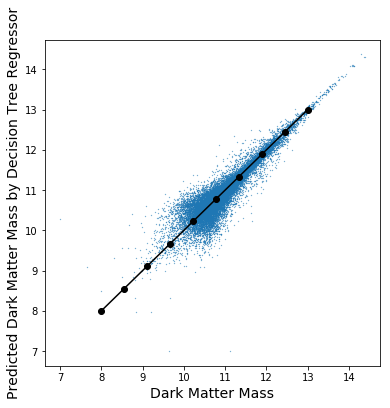

In [15]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

m = np.linspace(8, 13, 10)
n = m


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(Target,Cvpred, '.', markersize=0.5)
ax.plot(m, n, color='black', linestyle='-', marker='o')
ax.set_xlabel('Dark Matter Mass', fontsize=14)
ax.set_ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)
plt.show()

prediction :  [12.19026932 10.57231188 10.56585672 ... 11.8993304  10.19849602
 11.33917825]
R2 Score :  0.8403216162963856
The mean square value :  0.04260517099493706
The Score :  {'fit_time': array([0.23177552, 0.23349619, 0.23101091, 0.23306823, 0.2322185 ,
       0.23555303, 0.23373294]), 'score_time': array([0.00372529, 0.003546  , 0.00358725, 0.00358653, 0.00376248,
       0.00370908, 0.00363207]), 'test_score': array([0.83242732, 0.8555291 , 0.84522692, 0.85328395, 0.83494748,
       0.84411902, 0.85016747]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8451001810598839
Train Score :  1.0
Cross Vaidate prediction :  [14.29459689 13.47214659 12.61251977 ...  9.37030297 10.32806708
 10.07169974]
Pearson Correlation Coefficient: 0.92253452967584
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Decision Tree Regressor')

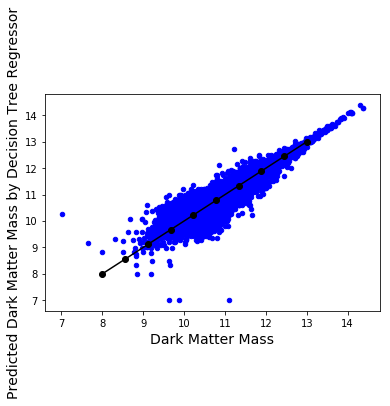

In [16]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((33889,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

prediction :  [12.20198398 10.51965439 10.74316582 ... 11.94354047 10.20648212
 11.40602854]
R2 Score :  0.8863514423525729
The mean square value :  0.03032355488319608
The Score :  {'fit_time': array([0.05993176, 0.05913973, 0.05757523, 0.05889845, 0.06079769,
       0.06028223, 0.05883932]), 'score_time': array([0.03314352, 0.03386426, 0.03330922, 0.0343616 , 0.03377223,
       0.03385592, 0.03330159]), 'test_score': array([0.87730466, 0.88650007, 0.8774813 , 0.89492493, 0.89022882,
       0.88755114, 0.89127155]), 'train_score': array([0.94579424, 0.94476823, 0.94558704, 0.94457421, 0.94470881,
       0.94471911, 0.94445039])}
Test Score :  0.8864660669424668
Train Score :  0.9449431470307327
Cross Vaidate prediction :  [14.25189276 13.46584538 11.69875797 ...  9.1166514  10.26697427
 10.14267809]
Pearson Correlation Coefficient: 0.9417345970535216
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by KNN Regressor')

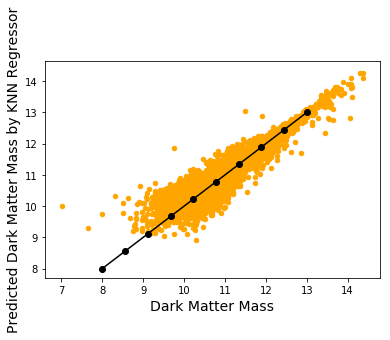

In [17]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((33889,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

prediction :  [12.0744361  10.43851975 10.77047249 ... 11.99238854 10.00385171
 11.44875854]
R2 Score :  0.8447157124376724
The mean square value :  0.04143274418846833
The Score :  {'fit_time': array([0.02416086, 0.00970244, 0.00936723, 0.009305  , 0.00940228,
       0.00976539, 0.00900006]), 'score_time': array([0.00931191, 0.00286746, 0.00266576, 0.0611074 , 0.00545359,
       0.00814676, 0.00322676]), 'test_score': array([0.83445244, 0.85150532, 0.8466819 , 0.85381776, 0.85046331,
       0.84287115, 0.85603672]), 'train_score': array([0.85096192, 0.8482199 , 0.84901958, 0.84786927, 0.84840589,
       0.8494107 , 0.84739157])}
Test Score :  0.8479755143318973
Train Score :  0.8487541194397099
Cross Vaidate prediction :  [13.92773557 13.22627428 12.47492641 ...  9.9082098   9.72342965
  9.46992024]
Pearson Correlation Coefficient: 0.9209316029187442
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Linear Regressor')

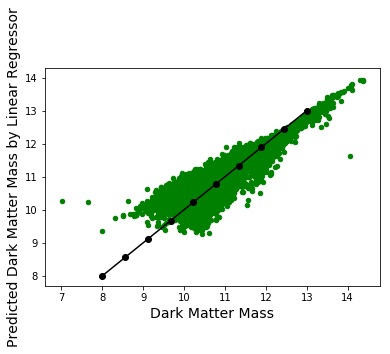

In [18]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((33889,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

prediction :  [12.21601833 10.49871184 10.75561753 ... 11.86687097 10.14159143
 11.3985218 ]
R2 Score :  0.9134079427601113
The mean square value :  0.02310437593329253
The Score :  {'fit_time': array([14.00572395, 14.1192553 , 13.89481115, 13.90261388, 13.97246933,
       13.86431098, 13.87167048]), 'score_time': array([0.16464853, 0.21776128, 0.16011238, 0.18216085, 0.15735221,
       0.15980291, 0.15561724]), 'test_score': array([0.91719997, 0.92128119, 0.91514383, 0.92212856, 0.92192356,
       0.91903888, 0.92400951]), 'train_score': array([0.98889598, 0.98873422, 0.98889068, 0.98876216, 0.98873683,
       0.98883282, 0.98862617])}
Test Score :  0.920103643245316
Train Score :  0.9887826938447296
Cross Vaidate prediction :  [14.24832367 13.4717517  12.54773631 ...  9.61556549 10.28909301
 10.03450896]
Pearson Correlation Coefficient: 0.9591082510976928
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Random Forest Regressor')

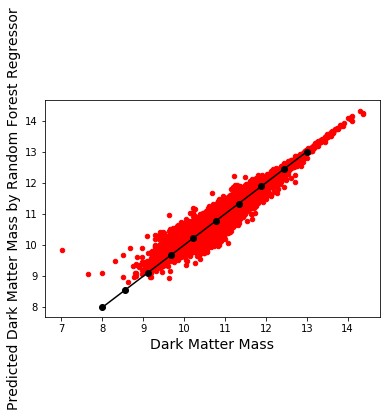

In [19]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((33889,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

prediction :  [12.23159589 10.48247127 10.75171055 ... 11.8471342  10.22035589
 11.40121221]
R2 Score :  0.9134570118812985
The mean square value :  0.023091283376552772
The Score :  {'fit_time': array([4.7876122 , 4.80271506, 4.76470041, 4.7833693 , 4.78259969,
       4.77121568, 4.77440572]), 'score_time': array([0.18595767, 0.19372702, 0.19882488, 0.19902992, 0.18386936,
       0.18379068, 0.18477106]), 'test_score': array([0.91611462, 0.92129682, 0.91585135, 0.92148075, 0.920532  ,
       0.9188726 , 0.92392853]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.9197252370995445
Train Score :  1.0
Cross Vaidate prediction :  [14.29512921 13.4630955  12.7290553  ...  9.55697291 10.31382253
  9.98411916]
Pearson Correlation Coefficient: 0.9590714619271403
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

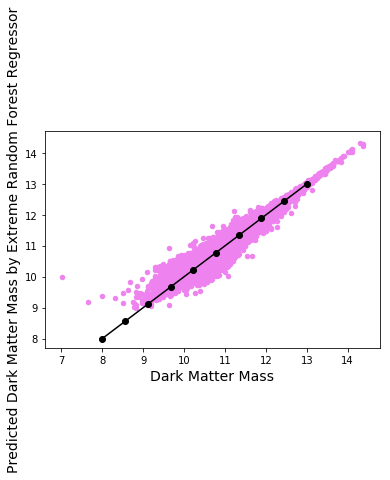

In [20]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((33889,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

 Model Comparisons for Case 2 


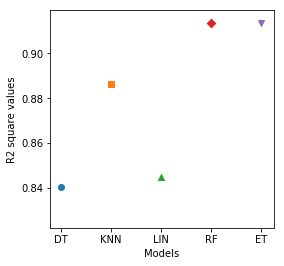

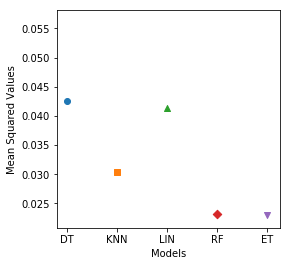

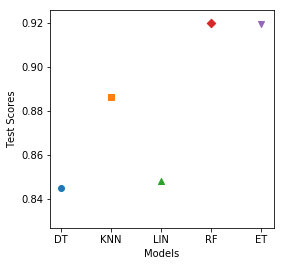

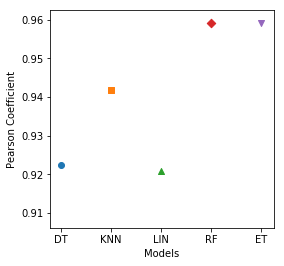

In [21]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()